<a id='header'></a>
# <img src="../images/PCAfold-logo.svg" style="height:100px"> Demo for data clustering

In this tutorial, we present the clustering functionalities from the `preprocess` module.

### Data clustering

A synthetic 2D data set is created and we perform clustering using the available partitioning functions:

- [**Section 1**](#variable_bins): Variable bins
- [**Section 2**](#predefined_bins): Pre-defined variable bins
- [**Section 3**](#zero_neighborhood_bins): Zero-neighborhood variable bins

Clustering combustion data sets:

- [**Section 4**](#mixture_fraction_bins): Bins of mixture fraction vector
- [**Section 5**](#PC_source): Clustering PC source terms to separate close-to-zero observations

Finally, we visualize the result of K-Means clustering on a synthetic 3D data set:

- [**Section 6**](#3d-clustering): Visualizing the clustering result in 3D

***

**Should plots be saved?**

In [1]:
save_plots = False

***

In [2]:
from PCAfold import preprocess
from PCAfold import reduction
import numpy as np
from matplotlib.colors import ListedColormap
save_filename = None

Set some initial plotting parameters:

In [31]:
x_label = '$x$'
y_label = '$y$'
z_label = '$z$'
figure_size = (6,3)
color_map = ListedColormap(['#0e7da7', '#ceca70', '#b45050', '#2d2d54'])

***

## Clustering based on a single vector

[**↑ Go to the top**](#header)

We start with partitioning the synthetic two-dimensional data set based on bins of a variable vector.

Create a synthetic two-dimensional data set:

In [32]:
x = np.linspace(-1,1,100)
y = -x**2 + 1

Visualize the synthetic 2D data set:

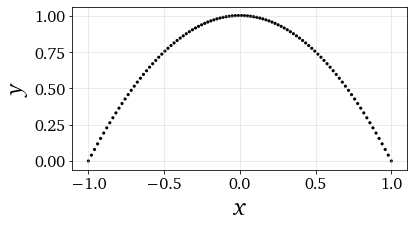

In [33]:
if save_plots==True: save_filename = '../images/tutorial-clustering-original-data-set.svg'
plt = reduction.plot_2d_manifold(x, y, x_label=x_label, y_label=y_label, figure_size=figure_size, save_filename=save_filename)

<a id='variable_bins'></a>
### Cluster with `variable_bins` into $k=4$ clusters:

[**↑ Go to the top**](#header)

In [34]:
(idx_variable_bins, borders_variable_bins) = preprocess.variable_bins(x, 4, verbose=True)

Border values for bins:
[-1.0, -0.5, 0.0, 0.5, 1.0]

Bounds for cluster 0:
	-1.0, -0.5152
Bounds for cluster 1:
	-0.4949, -0.0101
Bounds for cluster 2:
	0.0101, 0.4949
Bounds for cluster 3:
	0.5152, 1.0


Visualize clustering of the data set:

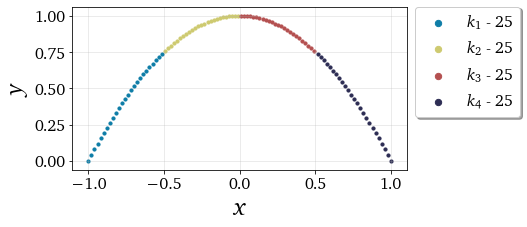

In [35]:
if save_plots==True: save_filename = '../images/tutorial-clustering-variable-bins-k4.svg'
plt = preprocess.plot_2d_clustering(x, y, idx_variable_bins, x_label=x_label, y_label=y_label, color_map=color_map, first_cluster_index_zero=False, grid_on=True, figure_size=figure_size, save_filename=save_filename)

<a id='predefined_bins'></a>
### Cluster with `predefined_variable_bins` into $k=4$ clusters:

[**↑ Go to the top**](#header)

In [36]:
split_values = [-0.6, 0.4, 0.8]
(idx_predefined_variable_bins, borders_predefined_variable_bins) = preprocess.predefined_variable_bins(x, split_values, verbose=True)

Border values for bins:
[-1.0, -0.6, 0.4, 0.8, 1.0]

Bounds for cluster 0:
	-1.0, -0.6162
Bounds for cluster 1:
	-0.596, 0.3939
Bounds for cluster 2:
	0.4141, 0.798
Bounds for cluster 3:
	0.8182, 1.0


Visualize clustering of the data set:

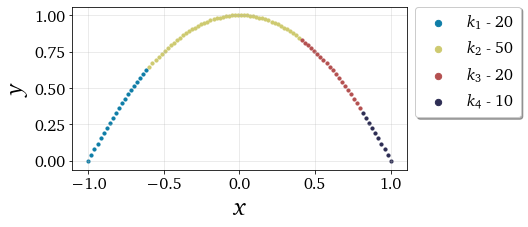

In [37]:
if save_plots==True: save_filename = '../images/tutorial-clustering-predefined-variable-bins-k4.svg'
plt = preprocess.plot_2d_clustering(x, y, idx_predefined_variable_bins, x_label=x_label, y_label=y_label, color_map=color_map, first_cluster_index_zero=False, grid_on=True, figure_size=figure_size, save_filename=save_filename)

<a id='zero_neighborhood_bins'></a>
### Cluster with `zero_neighborhood_bins` into $k=3$ clusters with `split_at_zero=True`:

[**↑ Go to the top**](#header)

In [38]:
(idx_zero_neighborhood_bins, borders_zero_neighborhood_bins) = preprocess.zero_neighborhood_bins(x, 3, zero_offset_percentage=10, split_at_zero=False, verbose=True)

Border values for bins:
[-1.  -0.2  0.2  1. ]

Bounds for cluster 0:
	-1.0, -0.2121
Bounds for cluster 1:
	-0.1919, 0.1919
Bounds for cluster 2:
	0.2121, 1.0


Visualize clustering of the data set:

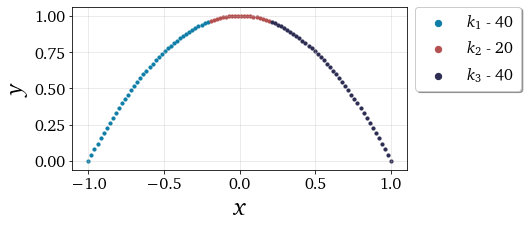

In [39]:
if save_plots==True: save_filename = '../images/tutorial-clustering-zero-neighborhood-bins-k3.svg'
plt = preprocess.plot_2d_clustering(x, y, idx_zero_neighborhood_bins, x_label=x_label, y_label=y_label, color_map=color_map, first_cluster_index_zero=False, grid_on=True, figure_size=figure_size, save_filename=save_filename)

### Cluster with `zero_neighborhood_bins` into $k=4$ clusters with `split_at_zero=True`:

[**↑ Go to the top**](#header)

In [40]:
(idx_zero_neighborhood_bins_split_at_zero, borders_zero_neighborhood_bins_split_at_zero) = preprocess.zero_neighborhood_bins(x, 4, zero_offset_percentage=10, split_at_zero=True, verbose=True)

Border values for bins:
[-1.  -0.2  0.   0.2  1. ]

Bounds for cluster 0:
	-1.0, -0.2121
Bounds for cluster 1:
	-0.1919, -0.0101
Bounds for cluster 2:
	0.0101, 0.1919
Bounds for cluster 3:
	0.2121, 1.0


Visualize clustering of the data set:

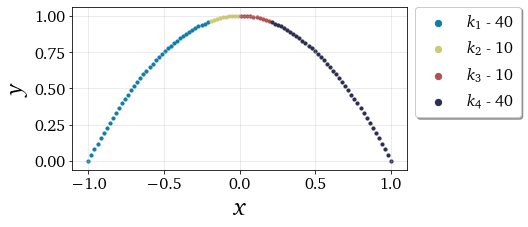

In [13]:
if save_plots==True: save_filename = '../images/tutorial-clustering-zero-neighborhood-bins-split-at-zero-k4.svg'
plt = preprocess.plot_2d_clustering(x, y, idx_zero_neighborhood_bins_split_at_zero, x_label=x_label, y_label=y_label, color_map=color_map, first_cluster_index_zero=False, grid_on=True, figure_size=figure_size, save_filename=save_filename)

***

## Clustering combustion data sets

<a id='mixture_fraction_bins'></a>

### Cluster with `mixture_fraction_bins` into $k=4$ clusters with:

[**↑ Go to the top**](#header)

In [44]:
# Original variables:
X = np.genfromtxt('data-state-space.csv', delimiter=',')

# Mixture fraction:
mixture_fraction = np.genfromtxt('data-mixture-fraction.csv', delimiter=',')

In [15]:
Z_stoich = 0.273
(idx_mixture_fraction_bins, borders_mixture_fraction_bins) = preprocess.mixture_fraction_bins(mixture_fraction, 5, Z_stoich, verbose=True)

Border values for bins:
[0.         0.1365     0.273      0.51533333 0.75766667 1.        ]

Bounds for cluster 0:
	0.0, 0.1313
Bounds for cluster 1:
	0.1414, 0.2727
Bounds for cluster 2:
	0.2828, 0.5152
Bounds for cluster 3:
	0.5253, 0.7576
Bounds for cluster 4:
	0.7677, 1.0


Visualize clustering of the data set:

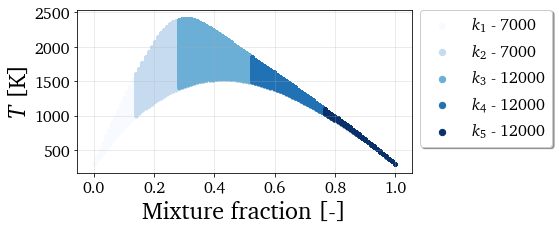

In [42]:
if save_plots==True: save_filename = '../images/tutorial-clustering-mixture-fraction-bins-k4.svg'
plt = preprocess.plot_2d_clustering(mixture_fraction, X[:,0], idx_mixture_fraction_bins, x_label='Mixture fraction [-]', y_label='$T$ [K]', color_map='Blues', first_cluster_index_zero=False, grid_on=True, figure_size=figure_size, save_filename=save_filename)

<a id='PC_source'></a>

### Cluster the PC source terms with `zero_neighborhood_bins` into $k=4$ clusters:

[**↑ Go to the top**](#header)

In [80]:
# Source terms of the original variables:
S_X = np.genfromtxt('data-state-space-sources.csv', delimiter=',')

Compute the source terms of the Principal Components:

In [ ]:
pca_X = reduction.PCA(X, scaling='auto', n_components=2)
S_Z = pca_X.transform(S_X, nocenter=True)

In [93]:
(idx_close_to_zero_source_terms, borders_close_to_zero_source_terms) = preprocess.zero_neighborhood_bins(S_Z[:,0], 4, zero_offset_percentage=5, split_at_zero=True, verbose=True)

Border values for bins:
[-87229.83051401  -5718.91469641      0.           5718.91469641
  27148.46341416]

Bounds for cluster 0:
	-87229.8305, -5722.1432
Bounds for cluster 1:
	-5717.5228, -0.0
Bounds for cluster 2:
	0.0, 5705.7159
Bounds for cluster 3:
	5719.0347, 27148.4634


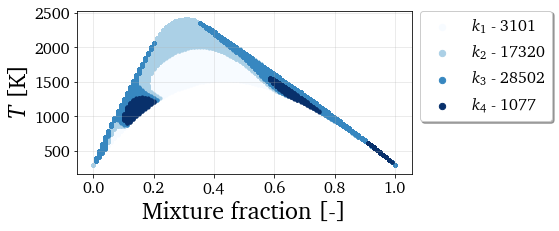

In [94]:
if save_plots==True: save_filename = '../images/tutorial-clustering-close-to-zero-source-terms-k4.svg'
plt = preprocess.plot_2d_clustering(mixture_fraction, X[:,0], idx_close_to_zero_source_terms, x_label='Mixture fraction [-]', y_label='$T$ [K]', color_map='Blues', first_cluster_index_zero=False, grid_on=True, figure_size=figure_size, save_filename=save_filename)

Merge clusters corresponding to the source terms with large magnitudes:

In [95]:
idx_merged = preprocess.flip_clusters(idx_close_to_zero_source_terms, {3:0})

Visualize clustering of the data set:

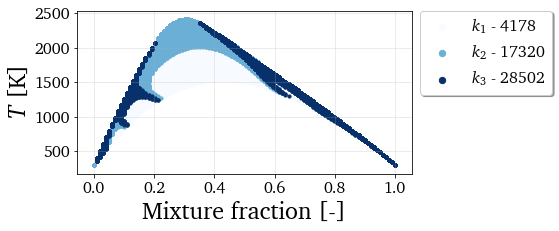

In [96]:
if save_plots==True: save_filename = '../images/tutorial-clustering-close-to-zero-source-terms-merged-k4.svg'
plt = preprocess.plot_2d_clustering(mixture_fraction, X[:,0], idx_merged, x_label='Mixture fraction [-]', y_label='$T$ [K]', color_map='Blues', first_cluster_index_zero=False, grid_on=True, figure_size=figure_size, save_filename=save_filename)


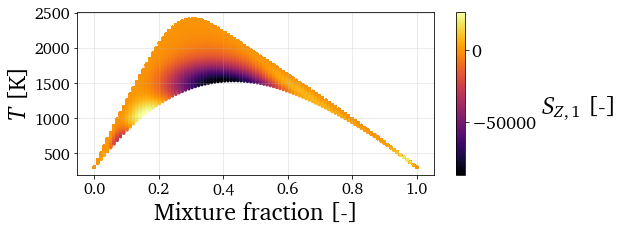

In [97]:
if save_plots==True: save_filename = '../images/tutorial-clustering-close-to-zero-source-terms-manifold.svg'
plt = reduction.plot_2d_manifold(mixture_fraction, X[:,0], color=S_Z[:,0], x_label='Mixture fraction [-]', y_label='$T$ [K]', color_map='inferno', colorbar_label='$S_{Z, 1}$ [-]', figure_size=(8,3), save_filename=save_filename)

***

<a id='3d-clustering'></a>
## Visualizing the clustering result in 3D

[**↑ Go to the top**](#header)

Create a synthetic three-dimensional data set:

In [17]:
n_observations = 50

x = np.tile(np.linspace(0,50,n_observations), n_observations)
y = np.zeros((n_observations,1))
z = np.zeros((n_observations*n_observations,1))

for i in range(1,n_observations):
    y = np.vstack((y, np.ones((n_observations,1))*i))
y = y.ravel()

for observation, x_value in enumerate(x):
    
    y_value = y[observation]
    
    if x_value <= 10:
        z[observation] = 2 * x_value + y_value
    elif x_value > 10 and x_value <= 35:
        z[observation] = 10 * x_value + y_value - 80
    elif x_value > 35:
        z[observation] = 5 * x_value + y_value + 95
        
(x, _, _) = preprocess.center_scale(x[:,None], scaling='0to1')
(y, _, _) = preprocess.center_scale(y[:,None], scaling='0to1')
(z, _, _) = preprocess.center_scale(z, scaling='0to1')

Visualize the synthetic 3D data set:

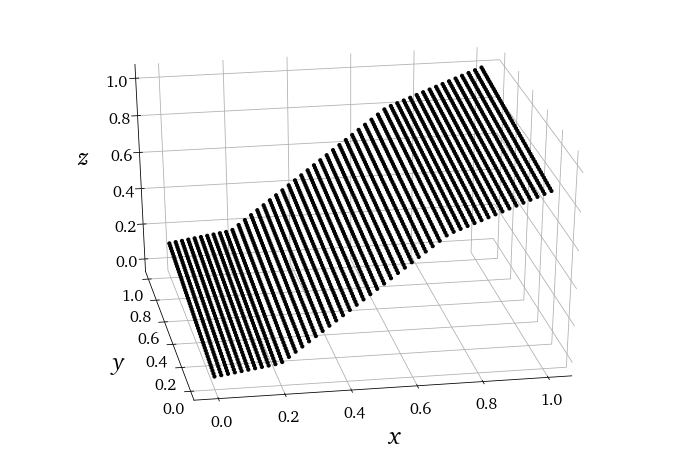

In [18]:
if save_plots==True: save_filename = '../images/tutorial-clustering-3d-data-set.svg'
plt = reduction.plot_3d_manifold(x, y, z, elev=30, azim=-100, x_label=x_label, y_label=y_label, z_label=z_label, figure_size=(12,8), save_filename=save_filename)

Partition the data set using the K-means algorithm:

In [19]:
from sklearn.cluster import KMeans

idx_kmeans = KMeans(n_clusters=4).fit(np.hstack((x, y, z))).labels_

Visualize clustering of the data set:

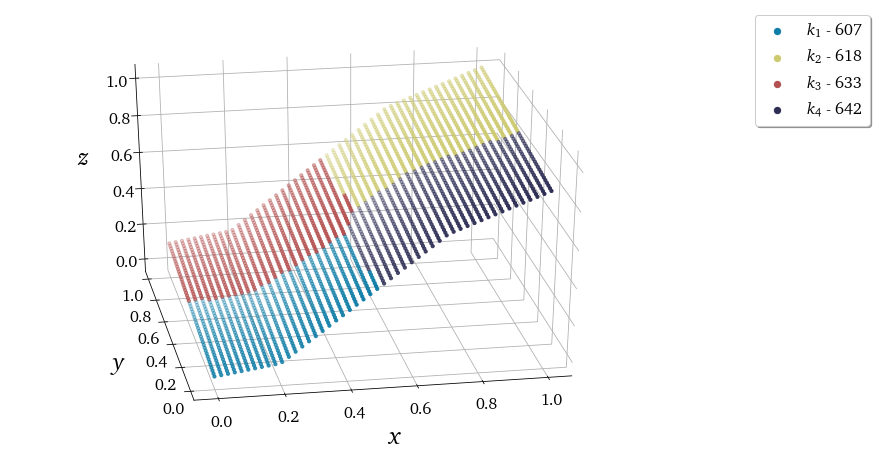

In [20]:
if save_plots==True: save_filename = '../images/tutorial-clustering-3d-data-set-kmeans.svg'
plt = preprocess.plot_3d_clustering(x, y, z, idx_kmeans, elev=30, azim=-100, x_label=x_label, y_label=y_label, z_label=z_label, color_map=color_map, first_cluster_index_zero=False, figure_size=(12,8), save_filename=save_filename)

***